In [1]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git  # clone repo
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17511, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17511 (delta 5), reused 0 (delta 0), pack-reused 17491 (from 3)
Receiving objects: 100% (17511/17511), 16.65 MiB | 19.01 MiB/s, done.
Resolving deltas: 100% (11996/11996), done.
/content/yolov5


In [2]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
# from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.9 MB/s eta 0:00:00
Setup complete. Using torch 2.6.0+cu124 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_p

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd /content

/content


In [5]:
from google.colab import files
uploaded = files.upload()

Saving bda_lab_full_final_product.zip to bda_lab_full_final_product.zip


In [6]:
import os
print(list(uploaded.keys()))

['bda_lab_full_final_product.zip']


In [7]:
!unzip bda_lab_full_final_product.zip

Archive:  bda_lab_full_final_product.zip
  inflating: data.yaml               
   creating: test/images/
  inflating: test/images/Am_804161cc-5724-11f0-9a21-b0dcefdb4993_jpg.rf.0311c55dc0ef3b9bb4b1c9beaa6f93af.jpg  
  inflating: test/images/Am_804161cc-5724-11f0-9a21-b0dcefdb4993_jpg.rf.a22cc821e8636e1ff393e249fbb81200.jpg  
  inflating: test/images/Am_804161cc-5724-11f0-9a21-b0dcefdb4993_jpg.rf.e447fda63ed28b9e3fd11b1dd84b4752.jpg  
  inflating: test/images/Am_8653571a-5724-11f0-b58b-b0dcefdb4993_jpg.rf.03809aab29924e5ba624d64d54784534.jpg  
  inflating: test/images/Am_8653571a-5724-11f0-b58b-b0dcefdb4993_jpg.rf.90f4781b100cbac5e37eb551af9befe5.jpg  
  inflating: test/images/Am_8653571a-5724-11f0-b58b-b0dcefdb4993_jpg.rf.d16aec2ba1cbc1a2b264c616a0001a95.jpg  
  inflating: test/images/Am_90092c35-5724-11f0-b3c9-b0dcefdb4993_jpg.rf.6ba626d93390f1d5b8fec840e48478ae.jpg  
  inflating: test/images/Am_90092c35-5724-11f0-b3c9-b0dcefdb4993_jpg.rf.d3274237ed8467824f46f87a833bd61d.jpg  
  infla

In [8]:
%cat data.yaml

train: ../train/images
val: ../test/images

nc: 23
names: ['Am', 'Cold', 'I', 'Manit', 'My name is', 'No', 'Not feeling well', 'Sleep', 'Stop', 'Thank You', 'Tired', 'Want', 'Emergency', 'Washroom', 'Water', 'Yes', 'you', 'Feeling', 'Food', 'Good', 'Hello', 'Hot', 'I need help']

In [9]:
# define number of classes based on YAML
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])


In [10]:
num_classes

'23'

In [11]:
#this is the model configuration we will use
%cat /content/yolov5/models/yolov5m.yaml

# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.67 # model depth multiple
width_multiple: 0.75 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 

In [12]:

#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [13]:
%%writetemplate /content/yolov5/models/custom_yolov5m.yaml

# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license

# Parameters
nc: 23 # number of classes
depth_multiple: 0.67 # model depth multiple
width_multiple: 0.75 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]], # cat backbone P3
    [-1, 3, C3, [256, False]], # 17 (P3/8-small)

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]], # cat head P4
    [-1, 3, C3, [512, False]], # 20 (P4/16-medium)

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]], # cat head P5
    [-1, 3, C3, [1024, False]], # 23 (P5/32-large)

    [[17, 20, 23], 1, Detect, [nc, anchors]], # Detect(P3, P4, P5)
  ]

In [14]:
%%time
%cd /content/yolov5/
!python train.py \
  --img 768 \
  --batch 8 \
  --epochs 200 \
  --data '../data.yaml' \
  --cfg ./models/custom_yolov5m.yaml \
  --weights yolov5m.pt \
  --name yolov5m_results \
  --cache \
  --patience 25 \
  --project runs/train

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
    187/199      5.68G    0.01141    0.00565   0.002703         18        768:  37% 72/194 [00:21<00:40,  2.99it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    187/199      5.68G    0.01144   0.005666     0.0027         23        768:  38% 73/194 [00:22<00:39,  3.03it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    187/199      5.68G    0.01146    0.00569   0.002698         20        768:  38% 74/194 [00:22<00:40,  2.95it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp

In [15]:
!cp /content/yolov5/runs/train/yolov5m_results/weights/best.pt /content/gdrive/MyDrive/best.pt

In [16]:
!nvidia-smi

Sun Jul  6 22:51:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

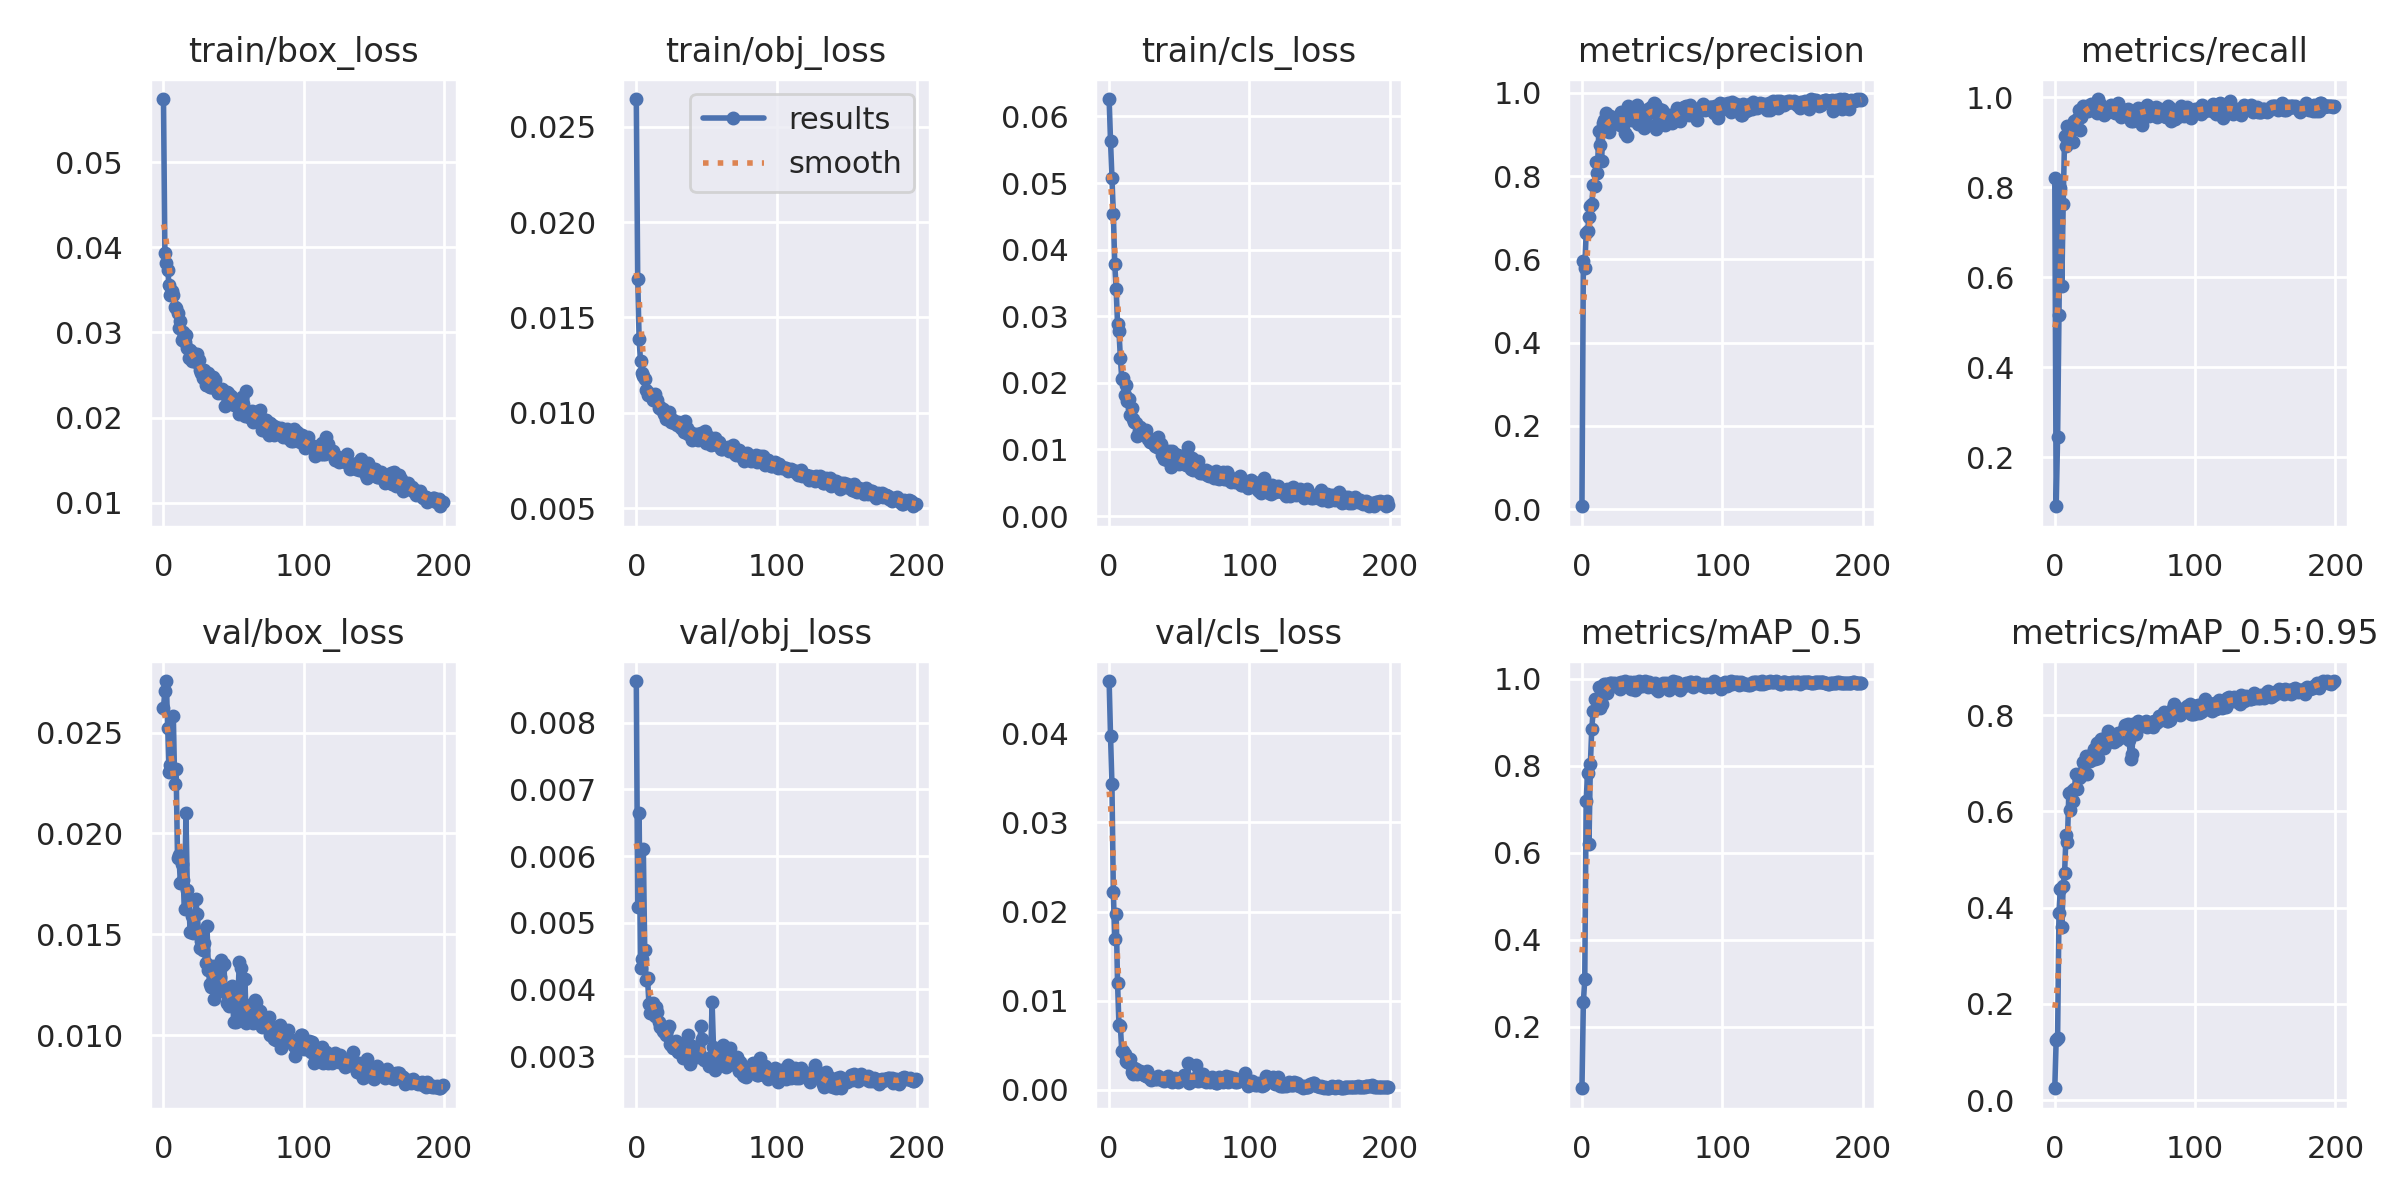

In [17]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason...
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5m_results/results.png', width=1000)  # view results.png

GROUND TRUTH TRAINING DATA:


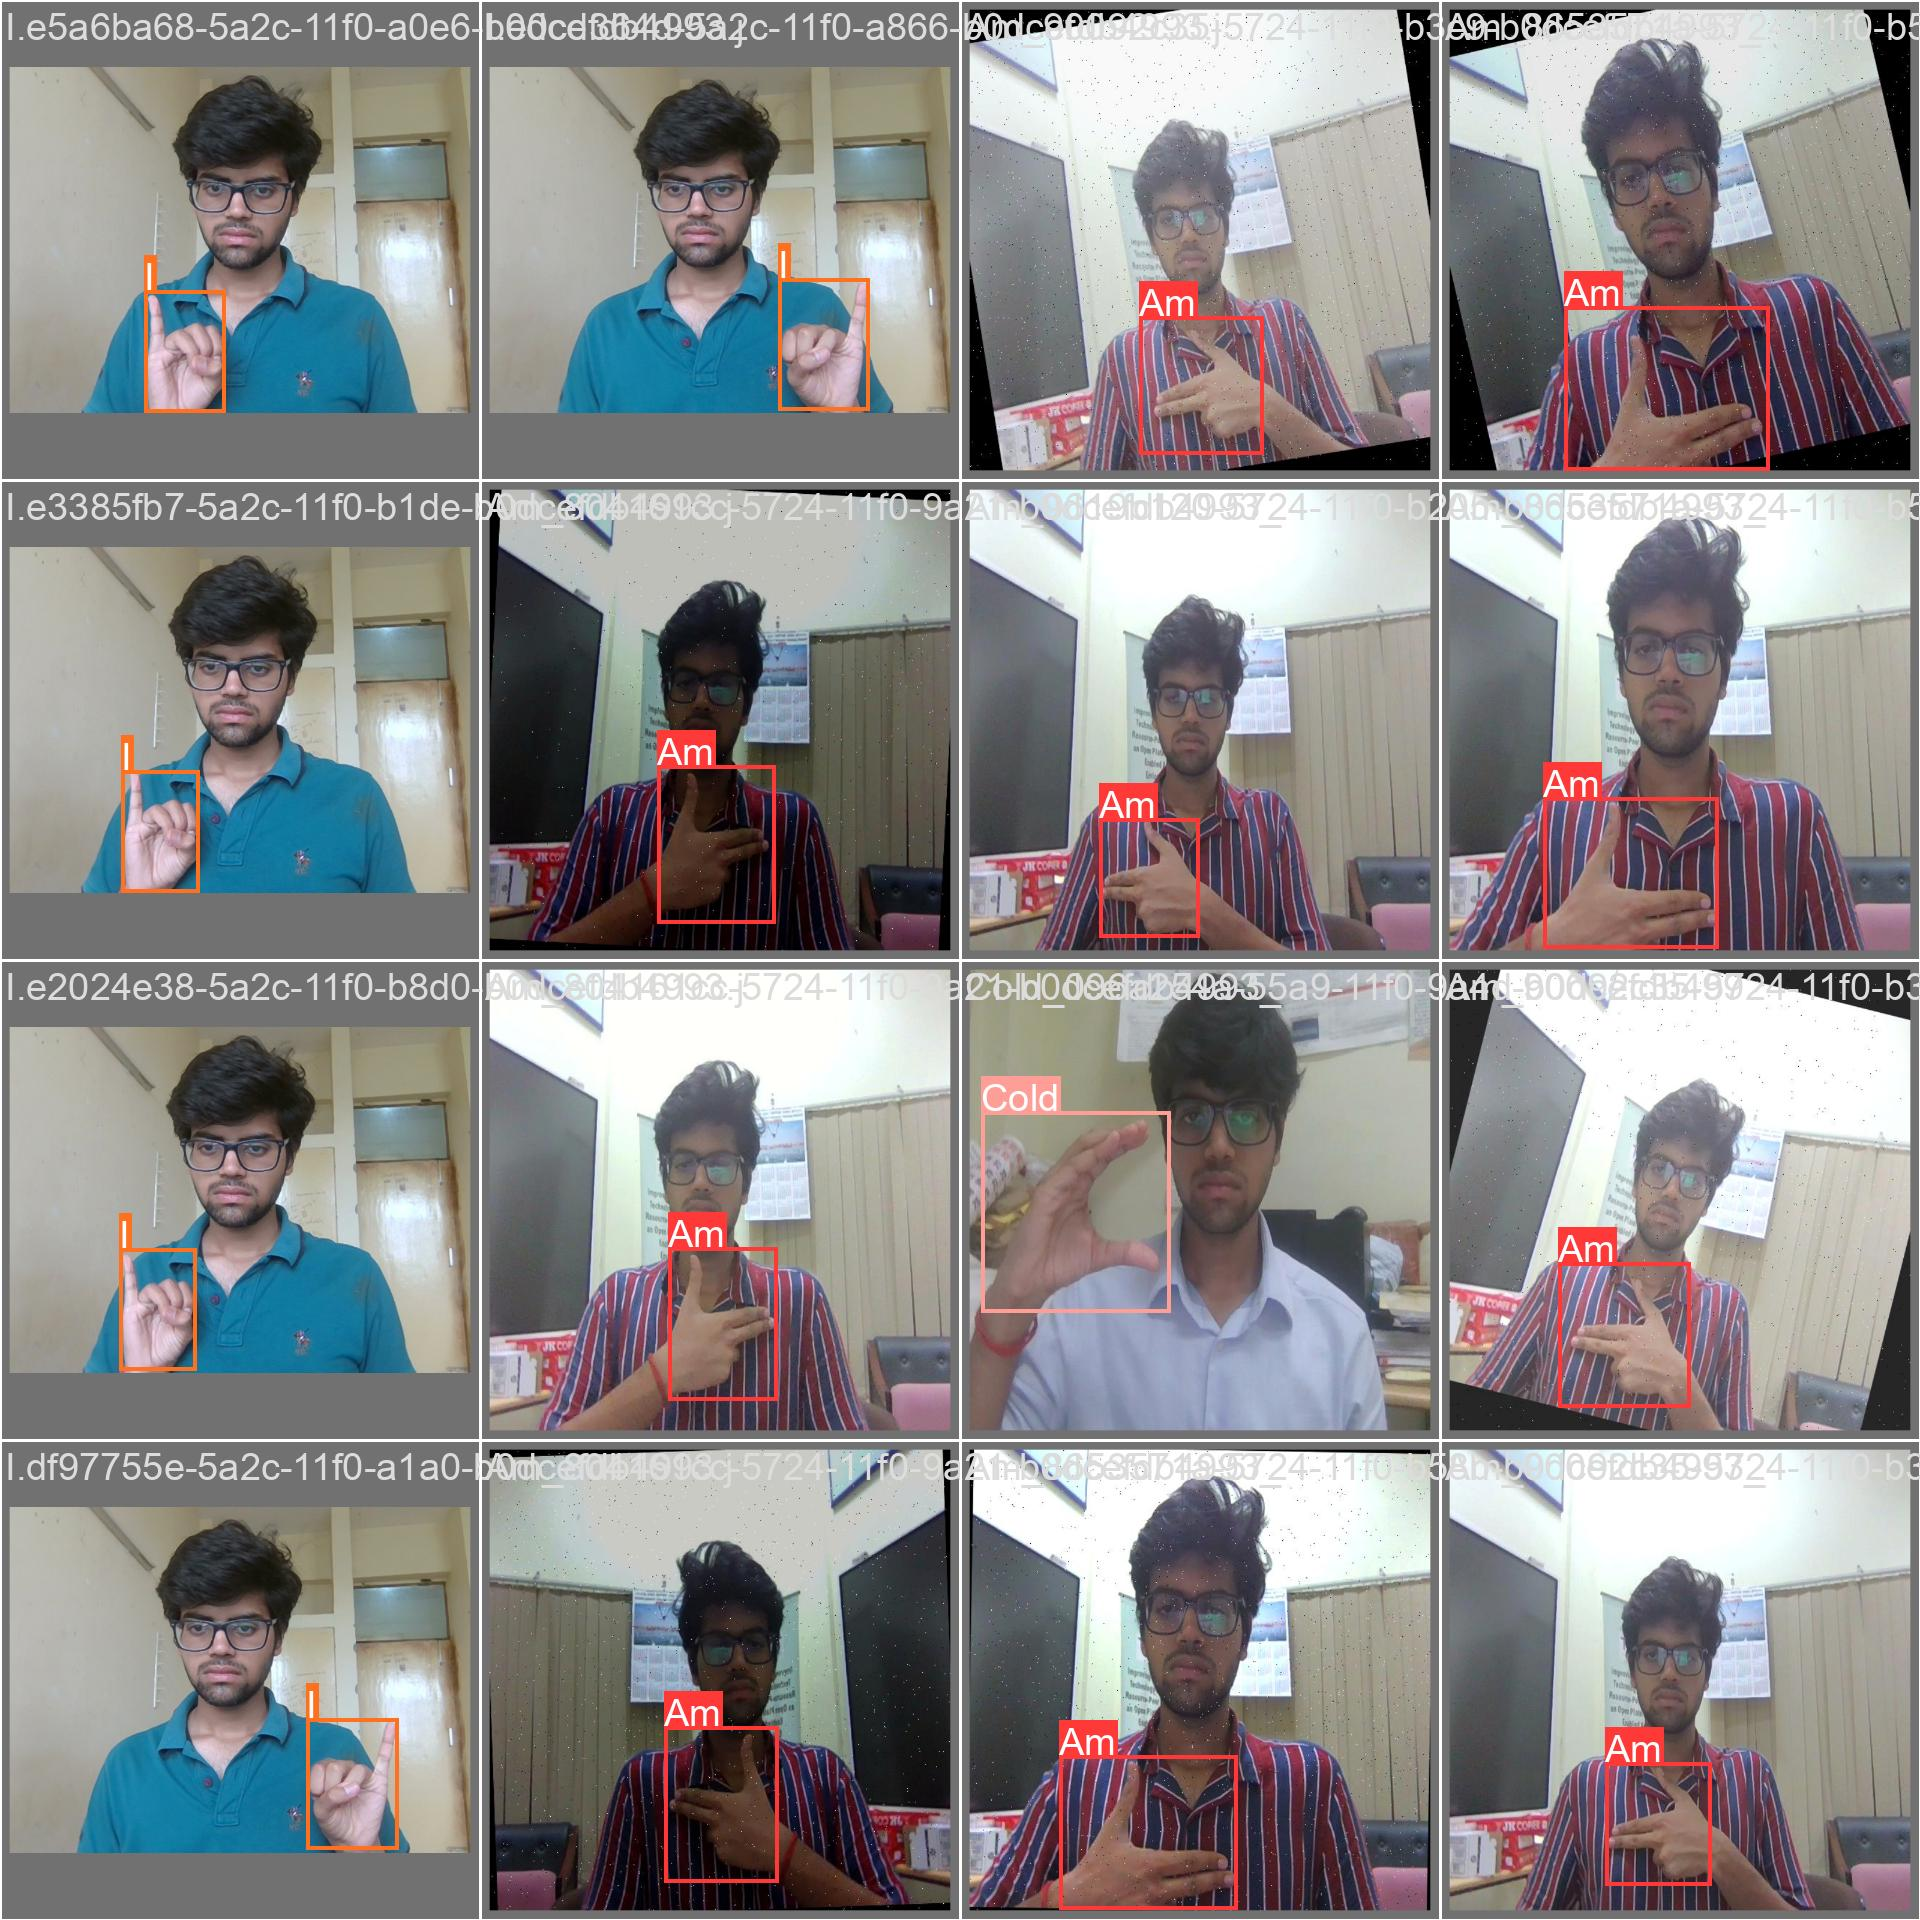

In [18]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5m_results/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


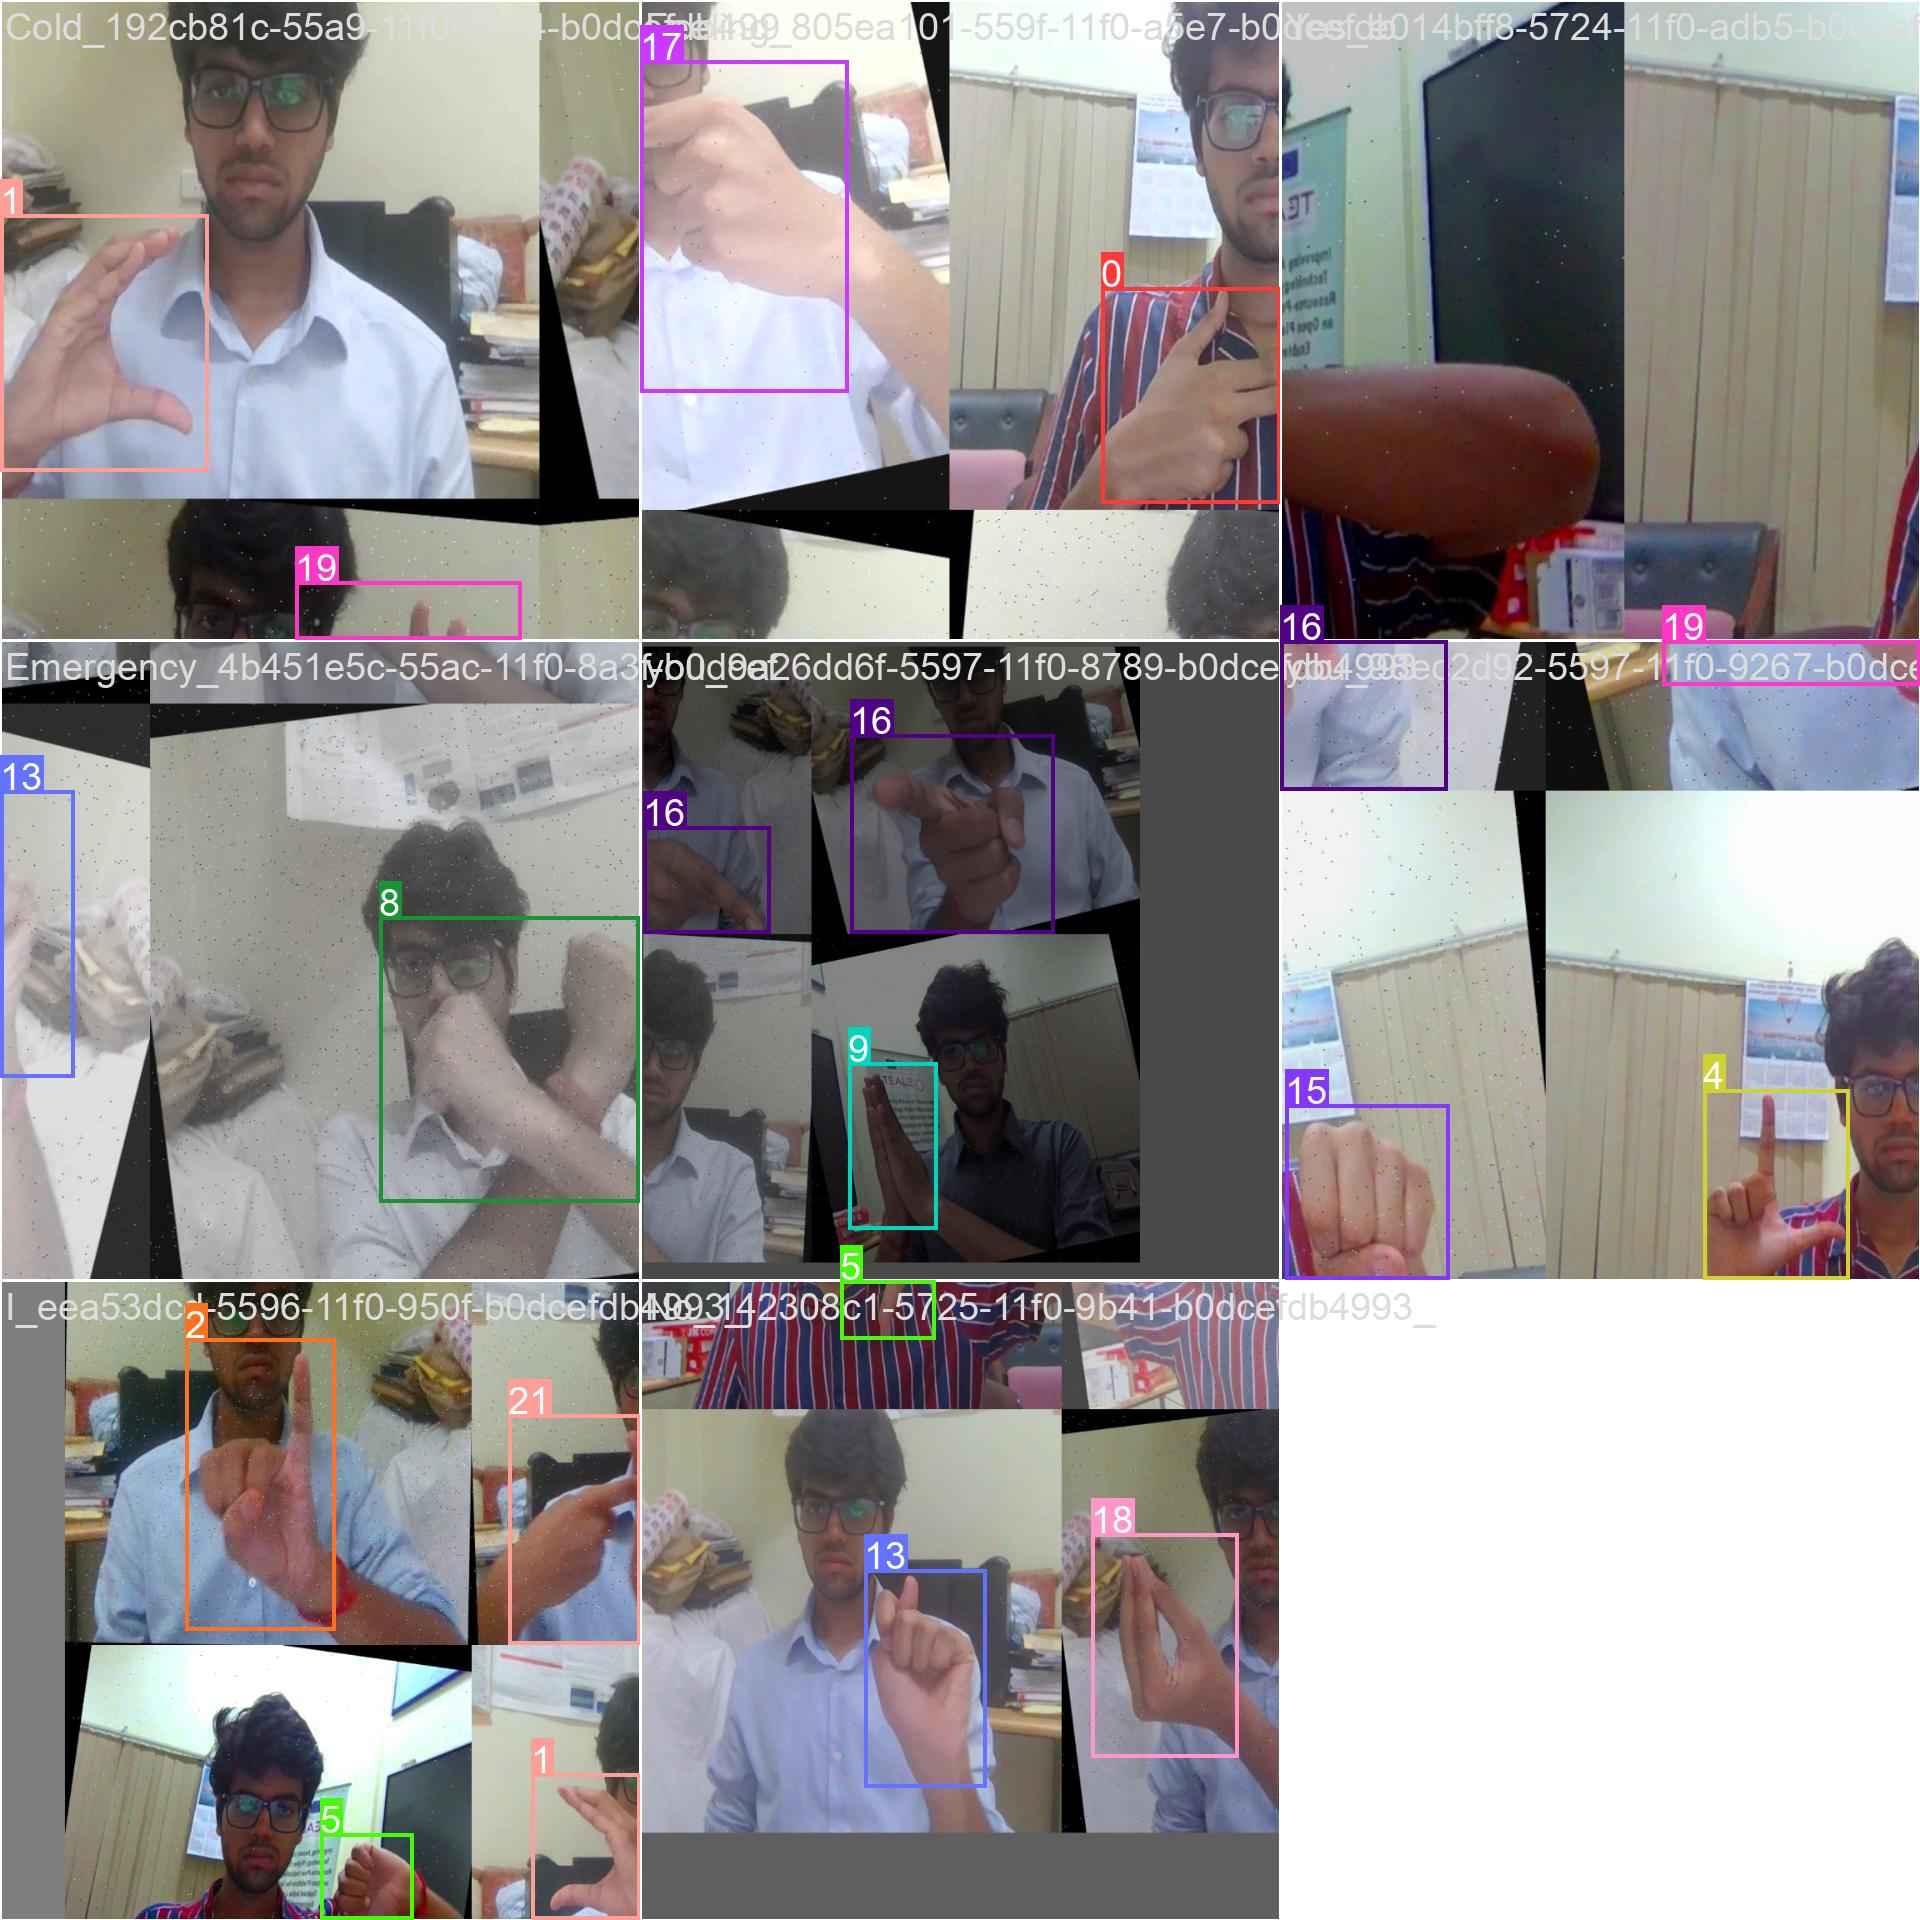

In [19]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5m_results/train_batch0.jpg', width=900)

In [20]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5m_results/weights/best.pt --img 768 --conf 0.35 --source ../test/images

/content/yolov5
detect: weights=['runs/train/yolov5m_results/weights/best.pt'], source=../test/images, data=data/coco128.yaml, imgsz=[768, 768], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
custom_YOLOv5m summary: 212 layers, 20941836 parameters, 0 gradients, 48.1 GFLOPs
image 1/202 /content/test/images/Am_804161cc-5724-11f0-9a21-b0dcefdb4993_jpg.rf.0311c55dc0ef3b9bb4b1c9beaa6f93af.jpg: 768x768 1 Am, 35.2ms
image 2/202 /content/test/images/Am_804161cc-5724-11f0-9a21-b0dcefdb4993_jpg.rf.a22cc821e8636e1ff393e249fbb81200.jpg: 768x768 1 Am, 35.3ms
ima

In [21]:
!cp /content/yolov5/runs/detect/exp /content/gdrive/MyDrive/exp

cp: -r not specified; omitting directory '/content/yolov5/runs/detect/exp'


In [23]:
!cp -r /content/yolov5/runs/detect/exp /content/gdrive/MyDrive/

In [24]:
!cp /content/yolov5/runs/train/yolov5m_results/results.png /content/gdrive/MyDrive